## <center> RĪGAS TEHNISKĀ UNIVERSITĀTE

### <center>DATORZINĀTNES UN INFORMĀCIJAS TEHNOLOĢIJAS FAKULTĀTE


### <center>Datorgrafikas un attēlu apstrādes pamati
<br> <hr>
#### Praktiskā darba Nr. 5
#### Vārds, Uzvārds: Gustavs Gončars
#### Studenta apliecības nummurs: 231RDB029


## DARBA UZDEVUMS

#### Variants: 029 (Režīms 1: Soft Light; Režīms 2: lighten)

Darba uzdevums:
Realizēt 2 dažādus attēlu pārklāšanās režīmus (piemēram, "Mīkstas gaismas režīmu" un "Iededzināšanas režīmu") balstoties uz Jūsu studentu apliecības numura pēdējiem 3 cipariem. Variantu saraksts pieejams ORTUS vidē pie 7.praktiskās nodarbības apraksta.

Piemēram, ja Jūsu studentu apliecības numurs ir 200RDB154, tad nepieciešams pildīt 154.variantu un realizēt sekojošos attēlu pārklāšanās režīmus:

Uzdevuma izpildes izvadei jāsastāv no abiem brīvi izvēlētiem ievades attēliem un realizētā pārklāšanās režīma rezultāta.
Katra pārklāšanās režīma izvade sastāv no 3 attēliem : attels_1, attels_2,  rezultats !!!
UZMANĪBU! Nedrīkst izmantot iebūvētās funkcijas pārklāšanās režīmu realizācijai. Obligāti jāizmanto lekcijā apskatītās formulas!


ORTUS vidē OBLIGĀTI nepieciešams iesniegt:

Jupyter Notebook failu ("*.ipynb" formātā) ar individuālā uzdevuma izpildi

Pārskatā obligāti jāiekļauj:
Uzdevuma nostādne,
Individuālā uzdevuma izpildes kods,
Individuālā uzdevuma izpildes failus jānosauc atbilstoši: "PD5_apl_nr", piemēram,  ja Jūsu studentu apliecības numurs ir 200RDB154, notebook failu ("*.ipynb" formātā) jānosauc kā "PD5_200RDB154".


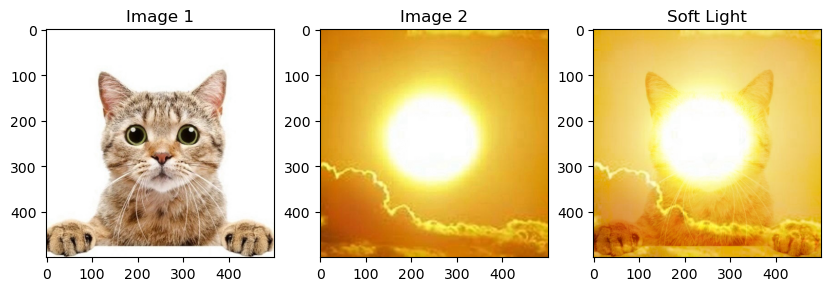

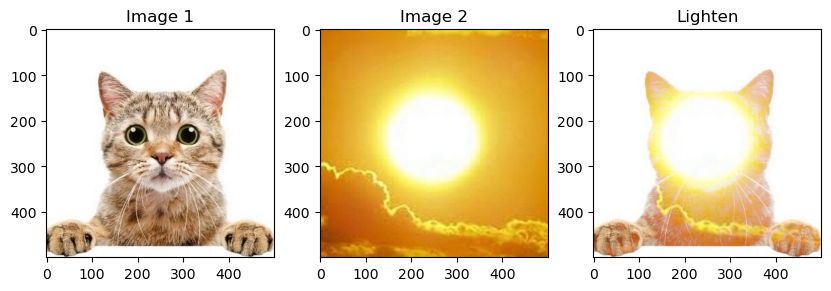

In [24]:
### Python pakotņu importēšana
#====================================
#darbībam ar masīviem
import numpy as np
from numpy import asarray

#attēlu apstrādei
import cv2
from PIL import Image

#atvērt/parādīt attēlus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Attēlu krāsu sistēmas un attēla izmēra maiņa  
#====================================

#atvērt attēlu
image_A = cv2.imread('cat.jpg')
image_B = cv2.imread('sun.jpg')

#mainīt no BGR uz RGB nolasi dēļ OpenCV 
im_rgb_A = cv2.cvtColor(image_A, cv2.COLOR_BGR2RGB)
im_rgb_B = cv2.cvtColor(image_B, cv2.COLOR_BGR2RGB)

#Mērogot attēlus, lai tie būtu vienāda izmēra
resized_img_A = cv2.resize(image_A, (500,500))
resized_img_B = cv2.resize(image_B, (500,500))

#Saglabāt mērogotos attēlus
cv2.imwrite('cat.jpg', resized_img_A)
cv2.imwrite('sun.jpg', resized_img_B)

#Read the image data as an array + normalize the values
#====================================

# atvērt attēlu
image_A = Image.open('cat.jpg')
image_B = Image.open('sun.jpg')

# pārveidot attēlu par numpy masīvu
data_A = asarray(image_A)
data_B = asarray(image_B)

# izveidot Pillow attēlu no ievades datiem
image_array_A = Image.fromarray(data_A)
image_array_B = Image.fromarray(data_B)

#normalizēt datu vērtības robežā no 0 līdz 1
image_norm_A = data_A/255.0
image_norm_B = data_B/255.0

#parādīt atvērtos attēlus
fig = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,3,1)
ax1.title.set_text('Image 1')
ax1.imshow(image_norm_A)
ax2 = fig.add_subplot(1,3,2)
ax2.title.set_text('Image 2')
ax2.imshow(image_norm_B)

SL=np.where(image_norm_A<=0.5, (2*image_norm_A-1)*(image_norm_B-((image_norm_B)**2))+image_norm_B, (2*image_norm_A-1)*(((image_norm_B)**(1/2))-image_norm_B)+image_norm_B)
SL=np.clip(SL,0,1)

ax3=fig.add_subplot(1,3,3)
ax3.title.set_text('Soft Light')
ax3.imshow(SL)

fig = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,3,1)
ax1.title.set_text('Image 1')
ax1.imshow(image_norm_A)
ax2 = fig.add_subplot(1,3,2)
ax2.title.set_text('Image 2')
ax2.imshow(image_norm_B)

Lighten=np.where(image_norm_B<=image_norm_A, image_norm_A, image_norm_B)
Lighten=np.clip(Lighten,0,1)

ax3=fig.add_subplot(1,3,3)
ax3.title.set_text('Lighten')
ax3.imshow(Lighten)